In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [2]:
pd.set_option('display.max_rows', 100) # 显示的最大行数（避免只显示部分行数据）
pd.set_option('display.max_columns', 1000) # 显示的最大列数（避免列显示不全）
pd.set_option("display.max_colwidth",1000) # 每一列最大的宽度（避免属性值或列名显示不全）
pd.set_option('display.width',1000)

In [3]:
pubg = pd.read_csv('pubg.csv')

In [4]:
#Prepare data
data = pubg.dropna(subset=["winPlacePerc"])

In [5]:
pubg = data[(data['damageDealt'] < 800) & \
             (data['DBNOs'] < 10) & \
             (data['headshotKills'] < 7.5) & \
             (data['assists'] < 5) & \
             (data['heals'] < 10) & \
             (data['killStreaks'] < 5) & \
             (data['longestKill'] < 500) & \
             (data['rideDistance'] < 8000) &\
             (data['swimDistance'] < 500) &\
             (data['walkDistance'] < 5000) &\
             (data['kills'] < 9) &\
             (data['roadKills'] < 3) &\
             (data['rankPoints'] < 2000)&\
             (data['weaponsAcquired'] < 15)&\
             (data['revives'] < 5)&\
             (data['boosts'] < 10)]

# Goal 1

In [6]:
ordinal_encoder = OrdinalEncoder()

In [7]:
#Ordinal Encoder——matchType
pubg_matchType_encoded = ordinal_encoder.fit_transform(pubg[['matchType']])
pubg_matchType_encoded = np.array(pubg_matchType_encoded)

In [8]:
#pubg["matchType"].value_counts()

In [9]:
#pubg_matchType_encoded

In [10]:
pubg['matchType_encoded'] = pubg_matchType_encoded

C:\ProgramData\Anaconda3\envs\py20200127\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
#pubg

In [12]:
#pubg.info()

In [13]:
pubg_train, pubg_validation = train_test_split(pubg ,test_size=0.3)

In [14]:
#pubg_train

In [15]:
#pubg_validation.info()

In [99]:
x = pubg[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
y = pubg[['winPlacePerc']].to_numpy()

In [17]:
x_train = pubg_train[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
y_train = pubg_train[['winPlacePerc']].to_numpy()

In [18]:
x_validation = pubg_validation[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
y_validation = pubg_validation[['winPlacePerc']].to_numpy()

In [19]:
# normalization process

x_train_norm = np.ones(x_train.shape)
x_validation_norm = np.ones(x_validation.shape)

num_features = x_train.shape[1]

for i in range(num_features):
    x_train_norm[:,i] = (x_train[:,i] - x[:,i].mean())/x[:,i].std()
    x_validation_norm[:,i] = (x_validation[:,i] - x[:,i].mean())/x[:,i].std()

In [20]:
x_train.shape[1]

25

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
Train on 2977314 samples, validate on 1275993 samples
Epoch 1/10
2977314/2977314 [==============================] - 5s 2us/sample - loss: 0.0177 - mse: 0.0177 - mae: 0.0853 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0679
Epoch 2/10
2977314/2977314 [==============================] - 4s 1us/sample - loss: 0.0084 - mse: 0.0084 - mae: 0.0655 - val_loss: 0.0080 - val_mse: 0.008

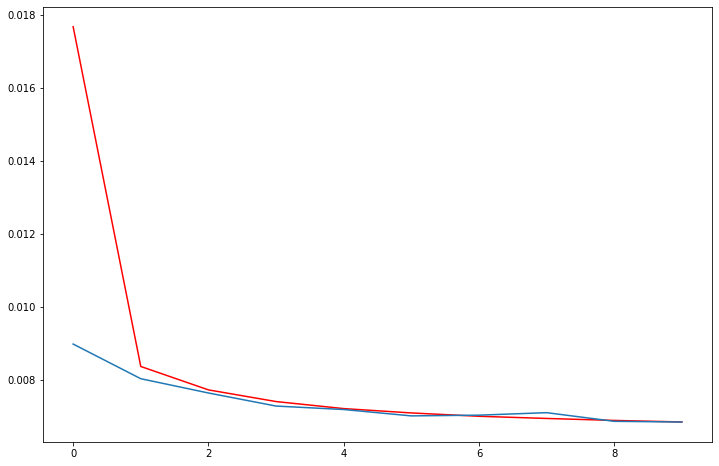

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 22,901
Trainable params: 22,901
Non-trainable params: 0
_________________________________________________________________
Train on 2977314 samples, validate on 1275993 samples
Epoch 1/10
2977314/2977314 [==============================] - 5s 2us/sample - loss: 0.0108 - mse: 0.0108 - mae: 0.0718 - val_loss: 0.0077 - val_mse: 0.0077 - val_mae: 0.0625
Epoch 2/10
2977314/2

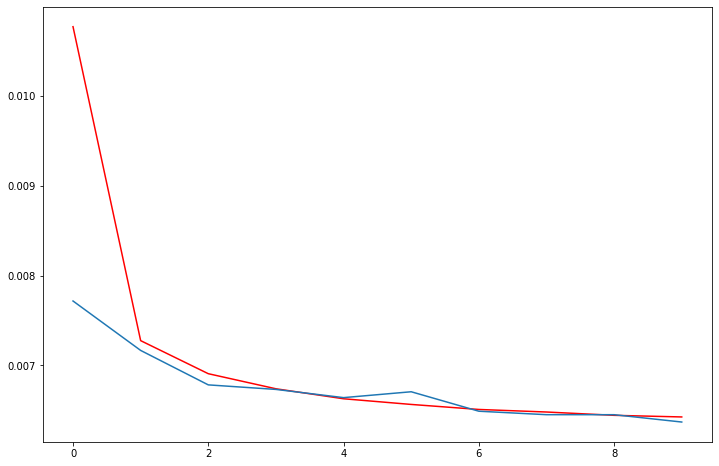

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 33,001
Trainable params: 33,001
Non-trainable params: 0
_________________________________________________________________
Train on 2977314 samples, validate on 1275993 samples
Epoch 1/10
2977314/2977314 [==============================] - 

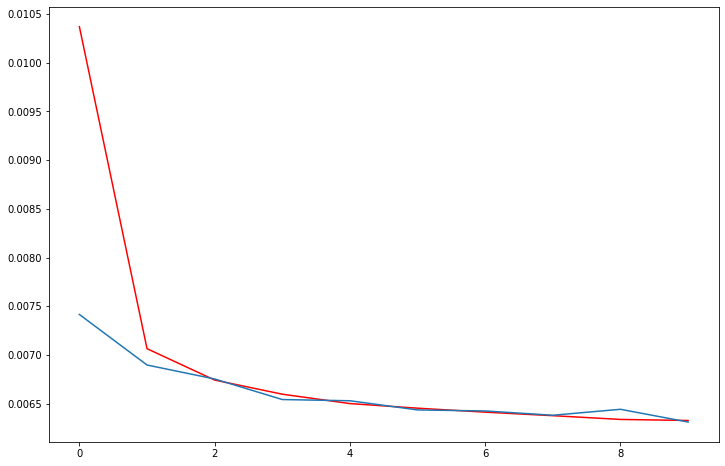

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 43,101
Trainable params: 43,101
Non-trainable params: 0
__________________________________________________

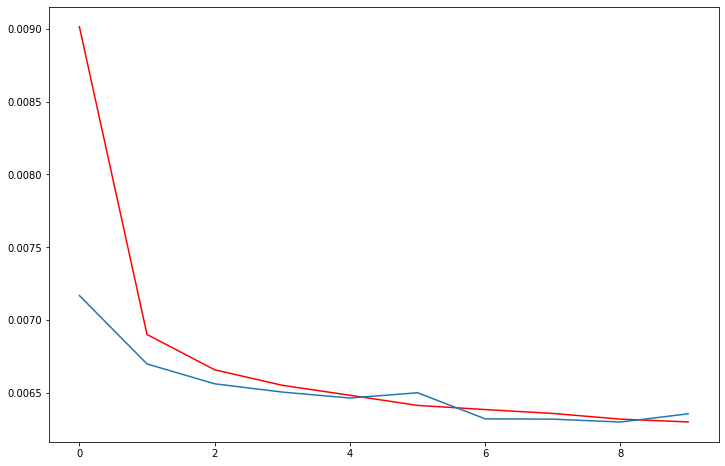

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

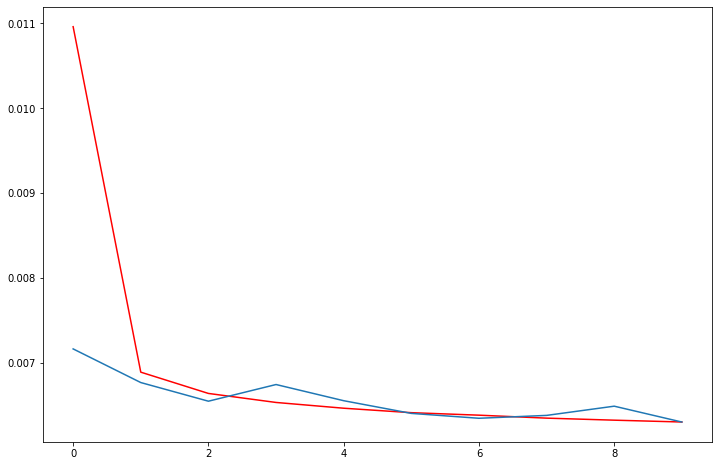

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 100)              

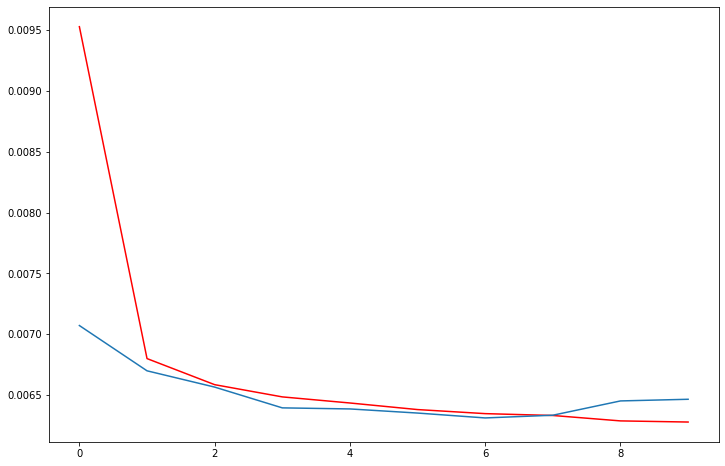

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_39 (Dense)             (None, 100)              

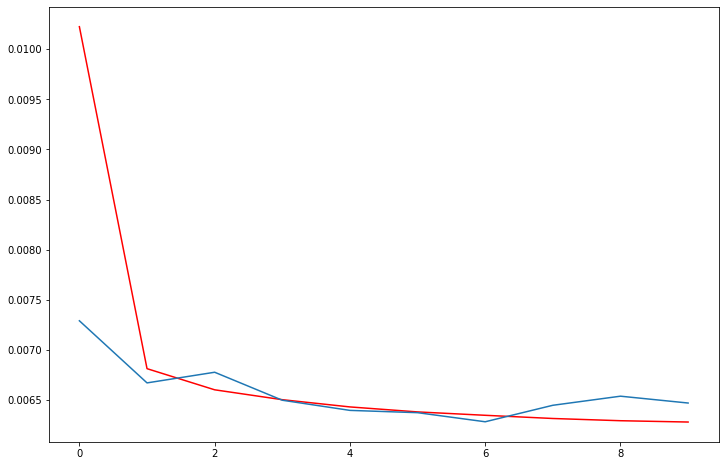

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_47 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_48 (Dense)             (None, 100)              

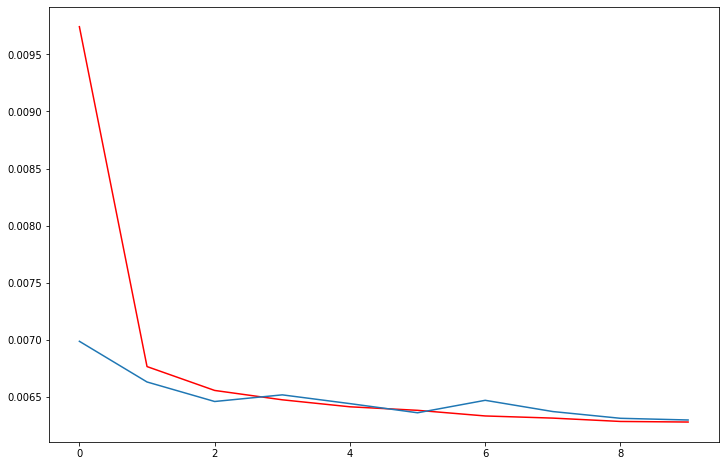

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_53 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_54 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_56 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_57 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_58 (Dense)             (None, 100)              

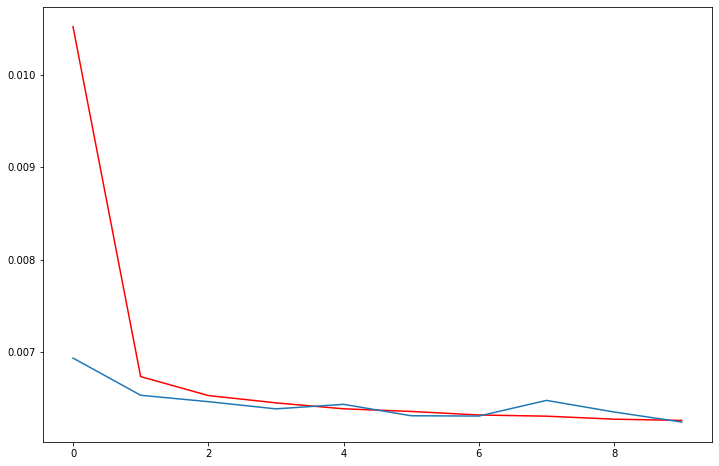

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 100)               2600      
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_67 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_68 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_69 (Dense)             (None, 100)              

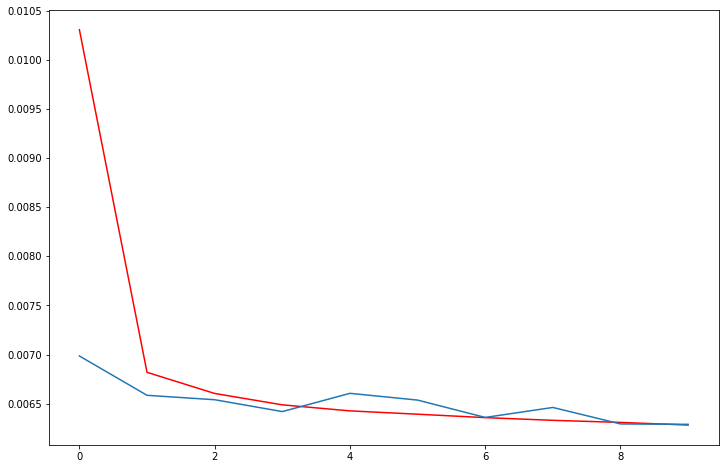

In [21]:
for i in range(1,11):
    model = keras.Sequential([
        keras.layers.Dense(100,input_shape=[x_train_norm.shape[1]])
    ])
    for j in range(0,i):
        model.add(keras.layers.Dense(100,activation = 'relu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    model.summary()
    history = model.fit(x_train_norm, y_train, 
          validation_data=(x_validation_norm, y_validation),
          epochs=10, 
          batch_size=4000)
    plt.figure(figsize=(12,8))
    plt.plot(history.history['mse'], 'r')
    plt.plot(history.history['val_mse'])
    plt.show()

# Goal 2

In [22]:
x5_train = pubg_train[['boosts','killPlace','heals','walkDistance','weaponsAcquired']].to_numpy()
y5_train = pubg_train[['winPlacePerc']].to_numpy()
x5_validation = pubg_validation[['boosts','killPlace','heals','walkDistance','weaponsAcquired']].to_numpy()
y5_validation = pubg_validation[['winPlacePerc']].to_numpy()
x5 = pubg[['boosts','killPlace','heals','walkDistance','weaponsAcquired']].to_numpy()
y5 = pubg[['winPlacePerc']].to_numpy()


x5_train_norm = (x5_train - x5.mean())/x5.std()
x5_validation_norm = (x5_validation - x5.mean())/x5.std()

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[x5_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [24]:
history = model.fit(x5_train_norm, y5_train, 
          validation_data=(x5_validation_norm, y5_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 2977314 samples, validate on 1275993 samples
Epoch 1/50
2977314/2977314 [==============================] - 8s 3us/sample - loss: 0.0188 - mse: 0.0188 - mae: 0.0994 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0891
Epoch 2/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0149 - mse: 0.0149 - mae: 0.0868 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0835
Epoch 3/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0141 - mse: 0.0141 - mae: 0.0837 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0833
Epoch 4/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0139 - mse: 0.0139 - mae: 0.0829 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0804
Epoch 5/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0138 - mse: 0.0138 - mae: 0.0826 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0810
Epoch 6/50
2977314/2977314 [==============================] - 6s 2us/sample 

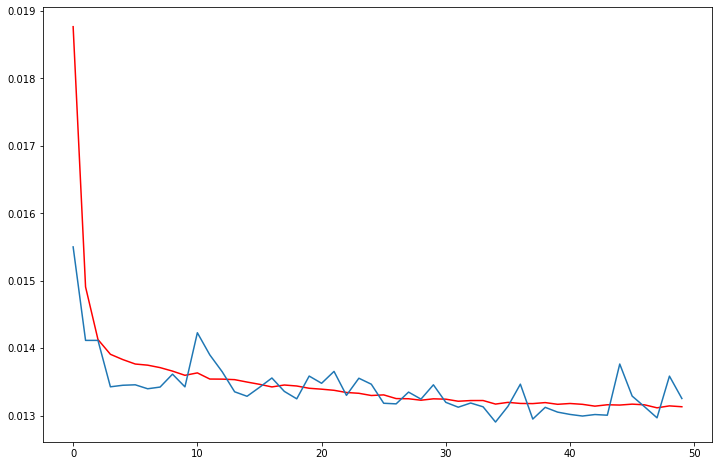

In [25]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

### best 10

In [26]:
x10_train = pubg_train[['boosts','killPlace','walkDistance','weaponsAcquired',\
                        'damageDealt','kills','longestKill','killStreaks','rideDistance',]].to_numpy()
y10_train = pubg_train[['winPlacePerc']].to_numpy()
x10_validation = pubg_validation[['boosts','killPlace','walkDistance','weaponsAcquired',\
                                 'damageDealt','kills','longestKill','killStreaks','rideDistance',]].to_numpy()
y10_validation = pubg_validation[['winPlacePerc']].to_numpy()
x10 = pubg[['boosts','killPlace','walkDistance','weaponsAcquired',\
                                 'damageDealt','kills','longestKill','killStreaks','rideDistance',]].to_numpy()
y10 = pubg[['winPlacePerc']].to_numpy()

x10_train_norm = (x10_train - x10.mean())/x10.std()
x10_validation_norm = (x10_validation - x10.mean())/x10.std()

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[x10_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [28]:
history = model.fit(x10_train_norm, y10_train, 
          validation_data=(x10_validation_norm, y10_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 2977314 samples, validate on 1275993 samples
Epoch 1/50
2977314/2977314 [==============================] - 7s 2us/sample - loss: 0.0170 - mse: 0.0170 - mae: 0.0938 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0882
Epoch 2/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0134 - mse: 0.0134 - mae: 0.0832 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0823
Epoch 3/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0129 - mse: 0.0129 - mae: 0.0814 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0808
Epoch 4/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0127 - mse: 0.0127 - mae: 0.0806 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0794
Epoch 5/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0124 - mse: 0.0124 - mae: 0.0797 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0789
Epoch 6/50
2977314/2977314 [==============================] - 6s 2us/sample 

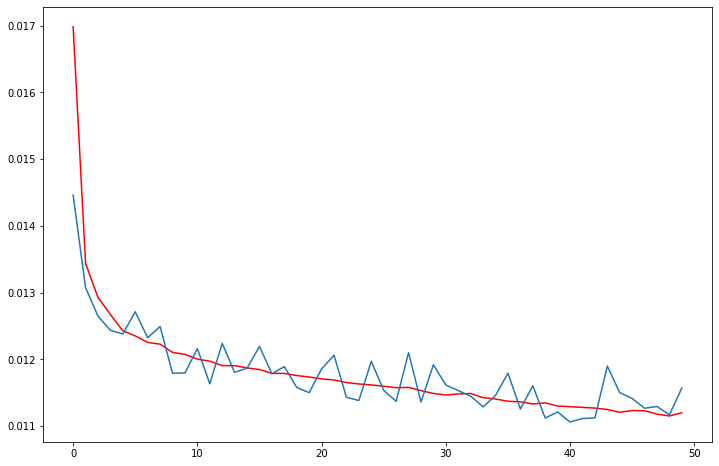

In [29]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

### best 15

In [30]:
x15_train = pubg_train[['boosts','killPlace','walkDistance','weaponsAcquired',\
                        'damageDealt','kills','longestKill','killStreaks','rideDistance',\
                        'assists','DBNOs','headshotKills','revives','swimDistance',]].to_numpy()
y15_train = pubg_train[['winPlacePerc']].to_numpy()
x15_validation = pubg_validation[['boosts','killPlace','walkDistance','weaponsAcquired',\
                                 'damageDealt','kills','longestKill','killStreaks','rideDistance',\
                                 'assists','DBNOs','headshotKills','revives','swimDistance',]].to_numpy()
y15_validation = pubg_validation[['winPlacePerc']].to_numpy()
x15 = pubg[['boosts','killPlace','walkDistance','weaponsAcquired',\
                                 'damageDealt','kills','longestKill','killStreaks','rideDistance',\
                                 'assists','DBNOs','headshotKills','revives','swimDistance',]].to_numpy()
y15 = pubg[['winPlacePerc']].to_numpy()

x15_train_norm = (x15_train - x15.mean())/x15.std()
x15_validation_norm = (x15_validation - x15.mean())/x15.std()

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[x15_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [32]:
history = model.fit(x15_train_norm, y15_train, 
          validation_data=(x15_validation_norm, y15_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 2977314 samples, validate on 1275993 samples
Epoch 1/50
2977314/2977314 [==============================] - 7s 2us/sample - loss: 0.0171 - mse: 0.0171 - mae: 0.0937 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0822
Epoch 2/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0132 - mse: 0.0132 - mae: 0.0822 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0810
Epoch 3/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0127 - mse: 0.0127 - mae: 0.0807 - val_loss: 0.0123 - val_mse: 0.0123 - val_mae: 0.0790
Epoch 4/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0125 - mse: 0.0125 - mae: 0.0799 - val_loss: 0.0123 - val_mse: 0.0123 - val_mae: 0.0789
Epoch 5/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0123 - mse: 0.0123 - mae: 0.0792 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0797
Epoch 6/50
2977314/2977314 [==============================] - 6s 2us/sample 

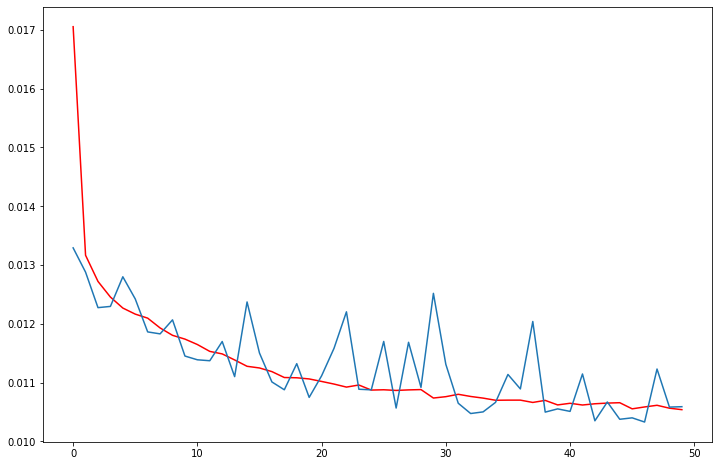

In [33]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

### best 20

In [34]:
x20_train = pubg_train[['boosts','killPlace','walkDistance','weaponsAcquired',\
                        'damageDealt','kills','longestKill','killStreaks','rideDistance',\
                        'assists','DBNOs','headshotKills','revives','swimDistance',\
                        'vehicleDestroys','numGroups','maxPlace','roadKills','matchType_encoded']].to_numpy()
y20_train = pubg_train[['winPlacePerc']].to_numpy()
x20_validation = pubg_validation[['boosts','killPlace','walkDistance','weaponsAcquired',\
                                 'damageDealt','kills','longestKill','killStreaks','rideDistance',\
                                 'assists','DBNOs','headshotKills','revives','swimDistance',\
                                 'vehicleDestroys','numGroups','maxPlace','roadKills','matchType_encoded']].to_numpy()
y20_validation = pubg_validation[['winPlacePerc']].to_numpy()
x20 = pubg[['boosts','killPlace','walkDistance','weaponsAcquired',\
                                 'damageDealt','kills','longestKill','killStreaks','rideDistance',\
                                 'assists','DBNOs','headshotKills','revives','swimDistance',\
                                 'vehicleDestroys','numGroups','maxPlace','roadKills','matchType_encoded']].to_numpy()
y20 = pubg[['winPlacePerc']].to_numpy()


x20_train_norm = (x20_train - x20.mean())/x20.std()
x20_validation_norm = (x20_validation - x20.mean())/x20.std()

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[x20_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [36]:
history = model.fit(x20_train_norm, y20_train, 
          validation_data=(x20_validation_norm, y20_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 2977314 samples, validate on 1275993 samples
Epoch 1/50
2977314/2977314 [==============================] - 8s 3us/sample - loss: 0.0151 - mse: 0.0151 - mae: 0.0874 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0795
Epoch 2/50
2977314/2977314 [==============================] - 7s 2us/sample - loss: 0.0118 - mse: 0.0118 - mae: 0.0766 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0742
Epoch 3/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0112 - mse: 0.0112 - mae: 0.0743 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0730
Epoch 4/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0107 - mse: 0.0107 - mae: 0.0730 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0733
Epoch 5/50
2977314/2977314 [==============================] - 6s 2us/sample - loss: 0.0104 - mse: 0.0104 - mae: 0.0718 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0719
Epoch 6/50
2977314/2977314 [==============================] - 6s 2us/sample 

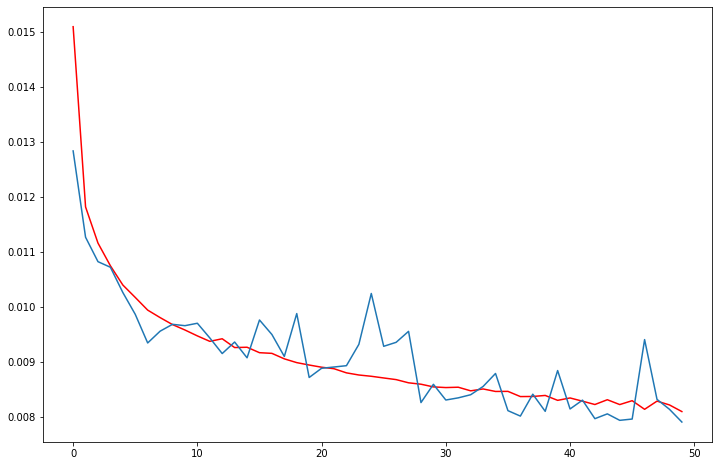

In [37]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

#### The more features of the data, the smaller the mse of the model and the more accurate the model, so we select as many data features as possible.

# Goal 3

#### We decided to use r2 as a measure of model accuracy. It can represent the explanatory power of the model to some extent. And we using 50 epochs as standard to fit our model.

### Amount 1000

In [60]:
sample = pubg.sample(1000)
sample_train, sample_validation = train_test_split(sample ,test_size=0.3)
samplex_train = sample_train[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_train = sample_train[['winPlacePerc']].to_numpy()
samplex_validation = sample_validation[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_validation = sample_validation[['winPlacePerc']].to_numpy()
samplex = sample[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley = sample[['winPlacePerc']].to_numpy()

samplex_train_norm = (samplex_train - samplex.mean())/samplex.std()
samplex_validation_norm = (samplex_validation - samplex.mean())/samplex.std()

In [61]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[samplex_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [62]:
history = model.fit(samplex_train_norm, sampley_train, 
          validation_data=(samplex_validation_norm, sampley_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 1s 2ms/sample - loss: 0.3100 - mse: 0.3100 - mae: 0.4817 - val_loss: 0.1300 - val_mse: 0.1300 - val_mae: 0.2926
Epoch 2/50
700/700 [==============================] - 0s 31us/sample - loss: 0.1181 - mse: 0.1181 - mae: 0.2715 - val_loss: 0.0635 - val_mse: 0.0635 - val_mae: 0.2094
Epoch 3/50
700/700 [==============================] - 0s 33us/sample - loss: 0.0587 - mse: 0.0587 - mae: 0.2059 - val_loss: 0.0740 - val_mse: 0.0740 - val_mae: 0.2264
Epoch 4/50
700/700 [==============================] - 0s 33us/sample - loss: 0.0769 - mse: 0.0769 - mae: 0.2323 - val_loss: 0.0735 - val_mse: 0.0735 - val_mae: 0.2251
Epoch 5/50
700/700 [==============================] - 0s 31us/sample - loss: 0.0759 - mse: 0.0759 - mae: 0.2317 - val_loss: 0.0525 - val_mse: 0.0525 - val_mae: 0.1888
Epoch 6/50
700/700 [==============================] - 0s 28us/sample - loss: 0.0512 - mse: 0.0512 - mae: 0.1880 - val_lo

Epoch 50/50
700/700 [==============================] - 0s 30us/sample - loss: 0.0202 - mse: 0.0202 - mae: 0.1065 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1211


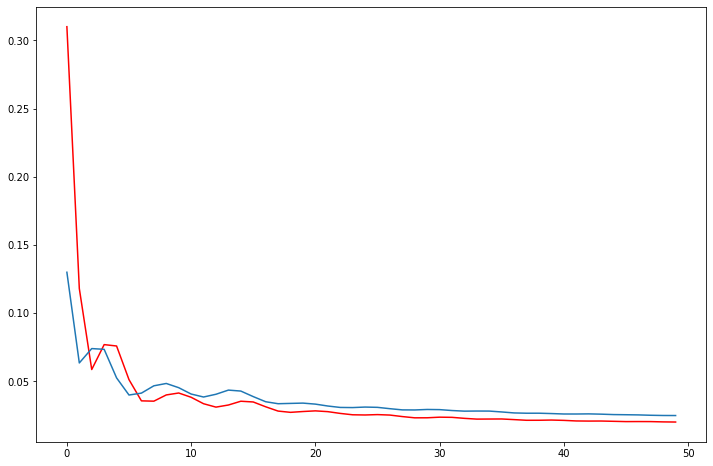

In [63]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

In [68]:
prediction = model.predict(samplex_validation_norm)
total_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, tf.reduce_mean(y))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, prediction)))
R_squared = tf.subtract(1, tf.divide(unexplained_error, total_error))
R_squared

<tf.Tensor: id=764995, shape=(), dtype=float64, numpy=0.7266650644061334>

### Amount 10000

In [69]:
sample = pubg.sample(10000)
sample_train, sample_validation = train_test_split(sample ,test_size=0.3)
samplex_train = sample_train[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_train = sample_train[['winPlacePerc']].to_numpy()
samplex_validation = sample_validation[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_validation = sample_validation[['winPlacePerc']].to_numpy()
samplex = sample[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley = sample[['winPlacePerc']].to_numpy()

samplex_train_norm = (samplex_train - samplex.mean())/samplex.std()
samplex_validation_norm = (samplex_validation - samplex.mean())/samplex.std()

In [70]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[samplex_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [71]:
history = model.fit(samplex_train_norm, sampley_train, 
          validation_data=(samplex_validation_norm, sampley_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 111us/sample - loss: 0.2999 - mse: 0.2999 - mae: 0.4486 - val_loss: 0.0889 - val_mse: 0.0889 - val_mae: 0.2456
Epoch 2/50
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0766 - mse: 0.0766 - mae: 0.2295 - val_loss: 0.0766 - val_mse: 0.0766 - val_mae: 0.2255
Epoch 3/50
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0648 - mse: 0.0648 - mae: 0.2064 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1516
Epoch 4/50
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0390 - mse: 0.0390 - mae: 0.1623 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1575
Epoch 5/50
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0369 - mse: 0.0369 - mae: 0.1552 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.1379
Epoch 6/50
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0322 - mse: 0.0322 - mae:

7000/7000 [==============================] - 0s 9us/sample - loss: 0.0185 - mse: 0.0185 - mae: 0.0992 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.0967
Epoch 50/50
7000/7000 [==============================] - 0s 9us/sample - loss: 0.0185 - mse: 0.0185 - mae: 0.0996 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.0977


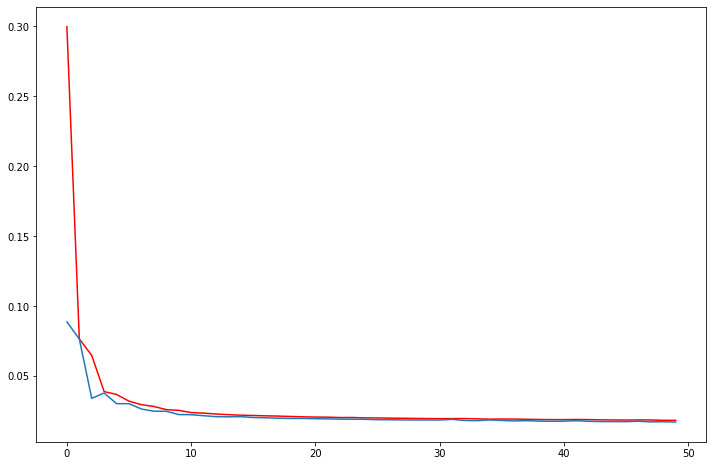

In [72]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

In [73]:
prediction = model.predict(samplex_validation_norm)
total_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, tf.reduce_mean(y))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, prediction)))
R_squared = tf.subtract(1, tf.divide(unexplained_error, total_error))
R_squared

<tf.Tensor: id=768092, shape=(), dtype=float64, numpy=0.8089455192431182>

### Amount 100000

In [74]:
sample = pubg.sample(100000)
sample_train, sample_validation = train_test_split(sample ,test_size=0.3)
samplex_train = sample_train[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_train = sample_train[['winPlacePerc']].to_numpy()
samplex_validation = sample_validation[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_validation = sample_validation[['winPlacePerc']].to_numpy()
samplex = sample[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley = sample[['winPlacePerc']].to_numpy()

samplex_train_norm = (samplex_train - samplex.mean())/samplex.std()
samplex_validation_norm = (samplex_validation - samplex.mean())/samplex.std()

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[samplex_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [76]:
history = model.fit(samplex_train_norm, sampley_train, 
          validation_data=(samplex_validation_norm, sampley_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 70000 samples, validate on 30000 samples
Epoch 1/50
70000/70000 [==============================] - 1s 21us/sample - loss: 0.0628 - mse: 0.0628 - mae: 0.1865 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.1300
Epoch 2/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0227 - mse: 0.0227 - mae: 0.1149 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.1103
Epoch 3/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0196 - mse: 0.0196 - mae: 0.1053 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1022
Epoch 4/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0184 - mse: 0.0184 - mae: 0.1013 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.0991
Epoch 5/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0178 - mse: 0.0178 - mae: 0.0989 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.0979
Epoch 6/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0175 - mse: 0.017

Epoch 49/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0131 - mse: 0.0131 - mae: 0.0825 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0823
Epoch 50/50
70000/70000 [==============================] - 1s 8us/sample - loss: 0.0133 - mse: 0.0133 - mae: 0.0834 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0795


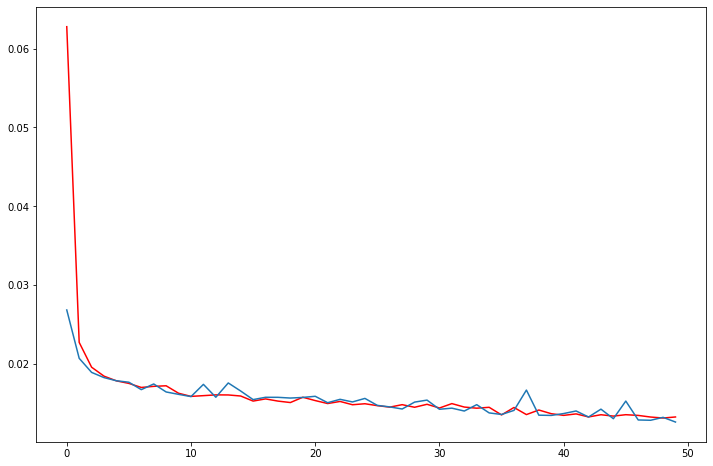

In [77]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

In [78]:
prediction = model.predict(samplex_validation_norm)
total_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, tf.reduce_mean(y))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, prediction)))
R_squared = tf.subtract(1, tf.divide(unexplained_error, total_error))
R_squared

<tf.Tensor: id=778033, shape=(), dtype=float64, numpy=0.8626913093866324>

### Amount 1000000

In [79]:
sample = pubg.sample(1000000)
sample_train, sample_validation = train_test_split(sample ,test_size=0.3)
samplex_train = sample_train[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_train = sample_train[['winPlacePerc']].to_numpy()
samplex_validation = sample_validation[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley_validation = sample_validation[['winPlacePerc']].to_numpy()
samplex = sample[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
sampley = sample[['winPlacePerc']].to_numpy()

samplex_train_norm = (samplex_train - samplex.mean())/samplex.std()
samplex_validation_norm = (samplex_validation - samplex.mean())/samplex.std()

In [80]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[samplex_train_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [81]:
history = model.fit(samplex_train_norm, sampley_train, 
          validation_data=(samplex_validation_norm, sampley_validation),
                    
          epochs=50, 
          batch_size=3000)

Train on 700000 samples, validate on 300000 samples
Epoch 1/50
700000/700000 [==============================] - 6s 9us/sample - loss: 0.0238 - mse: 0.0238 - mae: 0.1115 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0939
Epoch 2/50
700000/700000 [==============================] - 5s 8us/sample - loss: 0.0164 - mse: 0.0164 - mae: 0.0934 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0882
Epoch 3/50
700000/700000 [==============================] - 5s 8us/sample - loss: 0.0155 - mse: 0.0155 - mae: 0.0902 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0951
Epoch 4/50
700000/700000 [==============================] - 5s 8us/sample - loss: 0.0148 - mse: 0.0148 - mae: 0.0880 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0878
Epoch 5/50
700000/700000 [==============================] - 5s 8us/sample - loss: 0.0137 - mse: 0.0137 - mae: 0.0840 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0788
Epoch 6/50
700000/700000 [==============================] - 5s 7us/sample - loss: 0.0128

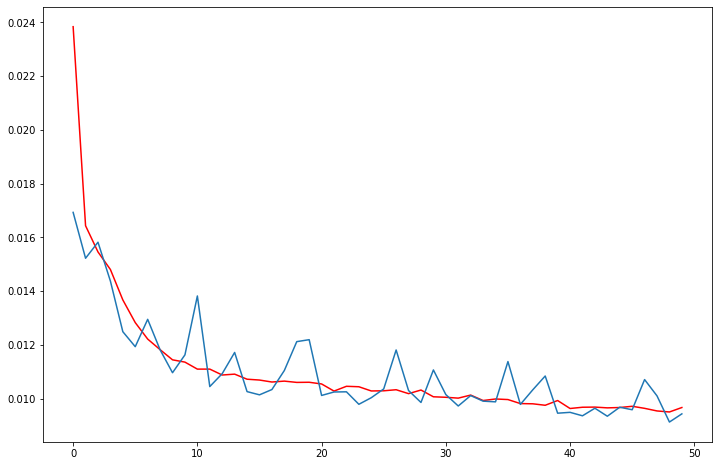

In [82]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mse'], 'r')
plt.plot(history.history['val_mse'])
plt.show()

In [83]:
prediction = model.predict(samplex_validation_norm)
total_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, tf.reduce_mean(y))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(sampley_validation, prediction)))
R_squared = tf.subtract(1, tf.divide(unexplained_error, total_error))
R_squared

<tf.Tensor: id=856406, shape=(), dtype=float64, numpy=0.8970416623726889>

#### Average validation accuracy increases as the amount of data increases. Average validation accuracy is best when the amount of data is 1,000,000.

# Goal 4

In [16]:
def rank(x):  
    if x >0.75:
        return 'Pro'  
    if x <= 0.75 and x > 0.5:
        return 'Good' 
    if x <= 0.5 and x >0.25:
        return 'Fair'
    if x <=0.25 and x >= 0:
        return 'Newbie'

In [17]:
pubg ['rank'] = pubg.apply(lambda x: rank(x.winPlacePerc), axis = 1)

C:\ProgramData\Anaconda3\envs\py20200127\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
pubg_rank_encoded = ordinal_encoder.fit_transform( pubg[['rank']])
pubg_rank_encoded = np.array(pubg_rank_encoded)

In [19]:
pubg ['rank_ordinalclass'] = pubg_rank_encoded

C:\ProgramData\Anaconda3\envs\py20200127\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
# the best amount of data
pubg4 = pubg.sample(1000000)
pubg_train4, pubg_validation4 = train_test_split(pubg4 ,test_size=0.3)

In [21]:
x_train4 = pubg_train4[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
y_train4 = pubg_train4[['rank_ordinalclass']].to_numpy()
x_validation4 = pubg_validation4[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
y_validation4 = pubg_validation4[['rank_ordinalclass']].to_numpy()

Goal4x = pubg4[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy()
Goal4y = pubg4[['rank_ordinalclass']].to_numpy()

x_train4_norm = (x_train4 - Goal4x.mean())/Goal4x.std()
x_validation4_norm = (x_validation4 - Goal4x.mean())/Goal4x.std()

In [22]:
def plot_train_valid(history):
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]

    plt.plot(np.arange(len(train_acc)) + 1, train_acc, "b.-", label="Training loss")
    plt.plot(np.arange(len(valid_acc)) + 1, valid_acc, "r.-", label="Validation loss")
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

## Neural Networks


In [25]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=[x_train4_norm.shape[1]]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
history = model.fit(x_train4_norm, y_train4, 
          validation_data=(x_validation4_norm, y_validation4),
          epochs=500, 
          batch_size=4000)

Train on 700000 samples, validate on 300000 samples
Epoch 1/500
700000/700000 [==============================] - 3s 4us/sample - loss: 0.7706 - acc: 0.6761 - val_loss: 0.6992 - val_acc: 0.7104
Epoch 2/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.6849 - acc: 0.7155 - val_loss: 0.6693 - val_acc: 0.7212
Epoch 3/500
700000/700000 [==============================] - 1s 2us/sample - loss: 0.6695 - acc: 0.7195 - val_loss: 0.6570 - val_acc: 0.7237
Epoch 4/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.6605 - acc: 0.7214 - val_loss: 0.6513 - val_acc: 0.7241
Epoch 5/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.6491 - acc: 0.7234 - val_loss: 0.6396 - val_acc: 0.7221
Epoch 6/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.6402 - acc: 0.7246 - val_loss: 0.6110 - val_acc: 0.7344
Epoch 7/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.6354 - acc: 0.726

700000/700000 [==============================] - 1s 1us/sample - loss: 0.4436 - acc: 0.8045 - val_loss: 0.4619 - val_acc: 0.7967
Epoch 116/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4463 - acc: 0.8032 - val_loss: 0.4488 - val_acc: 0.8030
Epoch 117/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4463 - acc: 0.8034 - val_loss: 0.4806 - val_acc: 0.7880
Epoch 118/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4472 - acc: 0.8028 - val_loss: 0.4605 - val_acc: 0.7965
Epoch 119/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4445 - acc: 0.8043 - val_loss: 0.4444 - val_acc: 0.8048
Epoch 120/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4440 - acc: 0.8043 - val_loss: 0.4528 - val_acc: 0.8008
Epoch 121/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4422 - acc: 0.8052 - val_loss: 0.4472 - val_acc: 0.8031
Epoch 122/500

700000/700000 [==============================] - 1s 1us/sample - loss: 0.4304 - acc: 0.8102 - val_loss: 0.4431 - val_acc: 0.8055
Epoch 230/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4317 - acc: 0.8095 - val_loss: 0.4419 - val_acc: 0.8062
Epoch 231/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4309 - acc: 0.8098 - val_loss: 0.4554 - val_acc: 0.8007
Epoch 232/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4352 - acc: 0.8076 - val_loss: 0.4404 - val_acc: 0.8064
Epoch 233/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4294 - acc: 0.8107 - val_loss: 0.4585 - val_acc: 0.7984
Epoch 234/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4328 - acc: 0.8088 - val_loss: 0.4369 - val_acc: 0.8083
Epoch 235/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4307 - acc: 0.8101 - val_loss: 0.4746 - val_acc: 0.7912
Epoch 236/500

700000/700000 [==============================] - 1s 1us/sample - loss: 0.4227 - acc: 0.8135 - val_loss: 0.4432 - val_acc: 0.8070
Epoch 344/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4215 - acc: 0.8137 - val_loss: 0.4435 - val_acc: 0.8075
Epoch 345/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4219 - acc: 0.8138 - val_loss: 0.4475 - val_acc: 0.8050
Epoch 346/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4210 - acc: 0.8145 - val_loss: 0.4446 - val_acc: 0.8057
Epoch 347/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4238 - acc: 0.8127 - val_loss: 0.4540 - val_acc: 0.8014
Epoch 348/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4227 - acc: 0.8132 - val_loss: 0.4403 - val_acc: 0.8080
Epoch 349/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4233 - acc: 0.8131 - val_loss: 0.4437 - val_acc: 0.8066
Epoch 350/500

700000/700000 [==============================] - 1s 1us/sample - loss: 0.4170 - acc: 0.8155 - val_loss: 0.4604 - val_acc: 0.8015
Epoch 458/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4150 - acc: 0.8166 - val_loss: 0.4548 - val_acc: 0.8045
Epoch 459/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4154 - acc: 0.8166 - val_loss: 0.4528 - val_acc: 0.8043
Epoch 460/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4167 - acc: 0.8157 - val_loss: 0.4670 - val_acc: 0.7987
Epoch 461/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4155 - acc: 0.8163 - val_loss: 0.4537 - val_acc: 0.8046
Epoch 462/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4164 - acc: 0.8157 - val_loss: 0.4487 - val_acc: 0.8064
Epoch 463/500
700000/700000 [==============================] - 1s 1us/sample - loss: 0.4146 - acc: 0.8164 - val_loss: 0.4480 - val_acc: 0.8075
Epoch 464/500

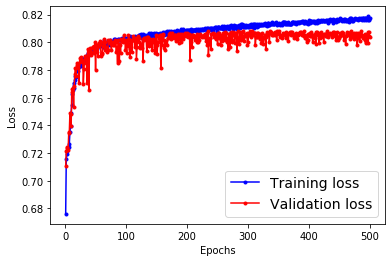

In [27]:
plot_train_valid(history)

## RNN

In [41]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(100, return_sequences=True, input_shape=[None, 1]),

    

        keras.layers.SimpleRNN(100),
      
        
        keras.layers.Dense(4,activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 100)         10200     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 404       
Total params: 30,704
Trainable params: 30,704
Non-trainable params: 0
_________________________________________________________________


In [42]:
x_train4_norm.shape, y_train4.shape

((700000, 25), (700000, 1))

In [24]:
x_validation4_norm.shape, y_validation4.shape

((300000, 25), (300000, 1))

In [25]:
b = x_validation4_norm.reshape((300000, 25,1))

In [26]:
a = x_train4_norm.reshape((700000, 25,1))

In [27]:
history = model.fit(a, y_train4, 
          validation_data=(b, y_validation4),
          epochs=100, 
          batch_size=4000)

Train on 700000 samples, validate on 300000 samples
Epoch 1/100
700000/700000 [==============================] - 10s 14us/sample - loss: 0.7663 - acc: 0.6735 - val_loss: 0.7157 - val_acc: 0.6977
Epoch 2/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.6988 - acc: 0.7046 - val_loss: 0.7439 - val_acc: 0.6808
Epoch 3/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.6734 - acc: 0.7121 - val_loss: 0.6503 - val_acc: 0.7215
Epoch 4/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.6464 - acc: 0.7220 - val_loss: 0.6664 - val_acc: 0.7116
Epoch 5/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.6241 - acc: 0.7305 - val_loss: 0.6375 - val_acc: 0.7217
Epoch 6/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.6137 - acc: 0.7343 - val_loss: 0.5869 - val_acc: 0.7463
Epoch 7/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.5989 - ac

Epoch 58/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.4880 - acc: 0.7850 - val_loss: 0.5055 - val_acc: 0.7776
Epoch 59/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.4853 - acc: 0.7863 - val_loss: 0.4809 - val_acc: 0.7881
Epoch 60/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.4863 - acc: 0.7863 - val_loss: 0.4998 - val_acc: 0.7788
Epoch 61/100
700000/700000 [==============================] - 7s 11us/sample - loss: 0.4868 - acc: 0.7856 - val_loss: 0.4890 - val_acc: 0.7853
Epoch 62/100
700000/700000 [==============================] - 7s 11us/sample - loss: 0.4864 - acc: 0.7859 - val_loss: 0.5007 - val_acc: 0.7798
Epoch 63/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.4892 - acc: 0.7844 - val_loss: 0.5011 - val_acc: 0.7790
Epoch 64/100
700000/700000 [==============================] - 7s 10us/sample - loss: 0.4853 - acc: 0.7864 - val_loss: 0.4798 - val_acc: 0.7888

In [38]:
model.evaluate(b, y_validation4)

300000/300000 [==============================] - 46s 154us/sample - loss: 0.4694


0.46935532353639603

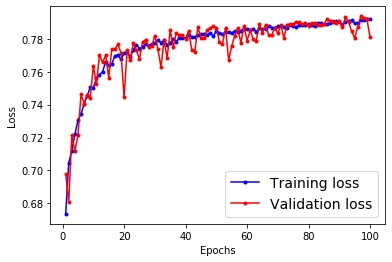

In [33]:
plot_train_valid(history)

In [34]:
y_pred = model.predict(b)

In [35]:
def single_predict(r, X_validation, y_validation, y_pred):
    plt.figure(figsize=(12,8))
    plot_series(X_validation[r, :, 0], y_validation[r, 0], y_pred[r, 0])
    plt.show()

In [39]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(25, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(25, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 25, linewidth=1)
    plt.axis([0, 25 + 1, -1.2, 1.2])

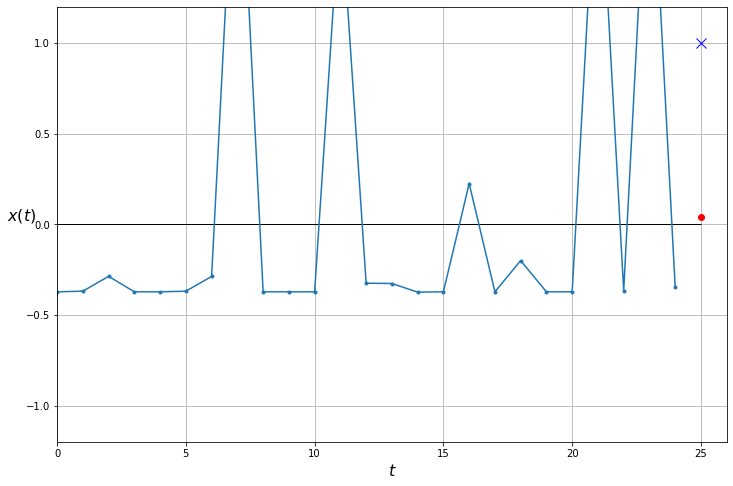

In [38]:
single_predict(0, b, y_validation4, y_pred)

## CNN

In [35]:
model = keras.Sequential([
#       keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Conv1D(64, 3, activation="relu", padding="same", input_shape=[25, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3),
    keras.layers.Conv1D(128, 3, activation="relu", padding="same"),
    #keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3),
    keras.layers.Dropout(0.26),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [36]:
b = x_validation4_norm.reshape((300000, 25,1))
a = x_train4_norm.reshape((700000, 25,1))

In [37]:
history = model.fit(a, y_train4, 
          validation_data=(b, y_validation4),
          epochs=500, 
          batch_size=5000)

Train on 700000 samples, validate on 300000 samples
Epoch 1/500
700000/700000 [==============================] - 6s 8us/sample - loss: 0.8598 - acc: 0.6445 - val_loss: 1.5163 - val_acc: 0.2644
Epoch 2/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.6680 - acc: 0.7155 - val_loss: 0.9625 - val_acc: 0.5379
Epoch 3/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.6150 - acc: 0.7367 - val_loss: 1.0106 - val_acc: 0.4697
Epoch 4/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.5915 - acc: 0.7462 - val_loss: 1.0504 - val_acc: 0.4971
Epoch 5/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.5750 - acc: 0.7532 - val_loss: 0.8786 - val_acc: 0.5781
Epoch 6/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.5651 - acc: 0.7571 - val_loss: 0.6477 - val_acc: 0.7056
Epoch 7/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.5550 - acc: 0.760

700000/700000 [==============================] - 5s 7us/sample - loss: 0.4534 - acc: 0.8026 - val_loss: 0.5817 - val_acc: 0.7668
Epoch 116/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4538 - acc: 0.8024 - val_loss: 0.5112 - val_acc: 0.7676
Epoch 117/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4519 - acc: 0.8033 - val_loss: 0.5265 - val_acc: 0.7755
Epoch 118/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4541 - acc: 0.8024 - val_loss: 0.4541 - val_acc: 0.7993
Epoch 119/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4518 - acc: 0.8032 - val_loss: 0.4631 - val_acc: 0.7989
Epoch 120/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4514 - acc: 0.8035 - val_loss: 0.4459 - val_acc: 0.8043
Epoch 121/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4516 - acc: 0.8037 - val_loss: 0.4618 - val_acc: 0.7960
Epoch 122/500

700000/700000 [==============================] - 5s 7us/sample - loss: 0.4394 - acc: 0.8087 - val_loss: 0.5711 - val_acc: 0.7686
Epoch 230/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4390 - acc: 0.8088 - val_loss: 0.4346 - val_acc: 0.8087
Epoch 231/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4385 - acc: 0.8088 - val_loss: 0.4488 - val_acc: 0.8019
Epoch 232/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4378 - acc: 0.8091 - val_loss: 0.5019 - val_acc: 0.7854
Epoch 233/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4386 - acc: 0.8088 - val_loss: 0.6509 - val_acc: 0.7224
Epoch 234/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4387 - acc: 0.8087 - val_loss: 0.4462 - val_acc: 0.8027
Epoch 235/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4379 - acc: 0.8090 - val_loss: 0.4859 - val_acc: 0.7870
Epoch 236/500

700000/700000 [==============================] - 5s 7us/sample - loss: 0.4337 - acc: 0.8104 - val_loss: 0.4314 - val_acc: 0.8101
Epoch 344/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4329 - acc: 0.8110 - val_loss: 0.4808 - val_acc: 0.7901
Epoch 345/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4326 - acc: 0.8111 - val_loss: 0.4854 - val_acc: 0.7895
Epoch 346/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4325 - acc: 0.8113 - val_loss: 1.0834 - val_acc: 0.6337
Epoch 347/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4325 - acc: 0.8113 - val_loss: 0.4994 - val_acc: 0.7820
Epoch 348/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4320 - acc: 0.8113 - val_loss: 0.4557 - val_acc: 0.8000
Epoch 349/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4334 - acc: 0.8107 - val_loss: 0.4699 - val_acc: 0.7986
Epoch 350/500

700000/700000 [==============================] - 5s 7us/sample - loss: 0.4297 - acc: 0.8123 - val_loss: 0.4762 - val_acc: 0.7883
Epoch 458/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4304 - acc: 0.8116 - val_loss: 0.4437 - val_acc: 0.8046
Epoch 459/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4287 - acc: 0.8123 - val_loss: 0.6033 - val_acc: 0.7474
Epoch 460/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4299 - acc: 0.8120 - val_loss: 0.4623 - val_acc: 0.7954
Epoch 461/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4299 - acc: 0.8120 - val_loss: 0.4658 - val_acc: 0.7942
Epoch 462/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4288 - acc: 0.8129 - val_loss: 0.7057 - val_acc: 0.7276
Epoch 463/500
700000/700000 [==============================] - 5s 7us/sample - loss: 0.4301 - acc: 0.8119 - val_loss: 0.4366 - val_acc: 0.8078
Epoch 464/500

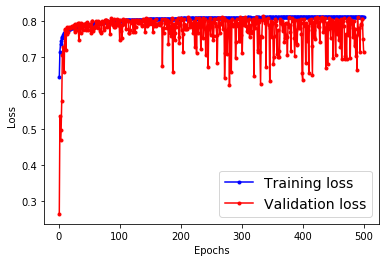

In [40]:
plot_train_valid(history)

#### It can be seen from these three models that rnn takes a long time and the accuracy rate cannot reach 0.8 within 100 epochs. The time of cnn is not long, and the accuracy rate is also better than that of rnn, but the result of the loss function shows large fluctuations. The speed of ordinary neural networks is fast, and the results are relatively good.

# Goal 5 

In [8]:
import random
ranselect1 = pubg.sample(random.randint(0,len(pubg)))
ranselect2 = pubg.sample(random.randint(0,len(pubg)))

In [ ]:
# use basisNN
rank1 = model.predict(ranselect1[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy())
rank2 = model.predict(ranselect2[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills',\
                      'killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance',\
                      'roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints',\
                      'matchType_encoded']].to_numpy())

In [ ]:
if rank1 > rank2 :
    print("no.1 win!")
if rank1 < rank2 :
    print("no.2 win!")